<a href="https://colab.research.google.com/github/Pawan-kumar-Singh/Bike_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Importing Relevent Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading and Understanding the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction (1)/Data _ Resources/SeoulBikeData.csv',encoding = 'unicode_escape')

In [4]:
# lets see how our dataset looks like
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# lets see how many rows and columns we have
df.shape

(8760, 14)

In [7]:
# let's see some information on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# let's see some summary
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


As we know that if mean and 50% (median) is close to each other that means that our data is normaly distributed.

In [9]:
# data duplication
len(df[df.duplicated()])

0

### Data Prepration and Cleaning

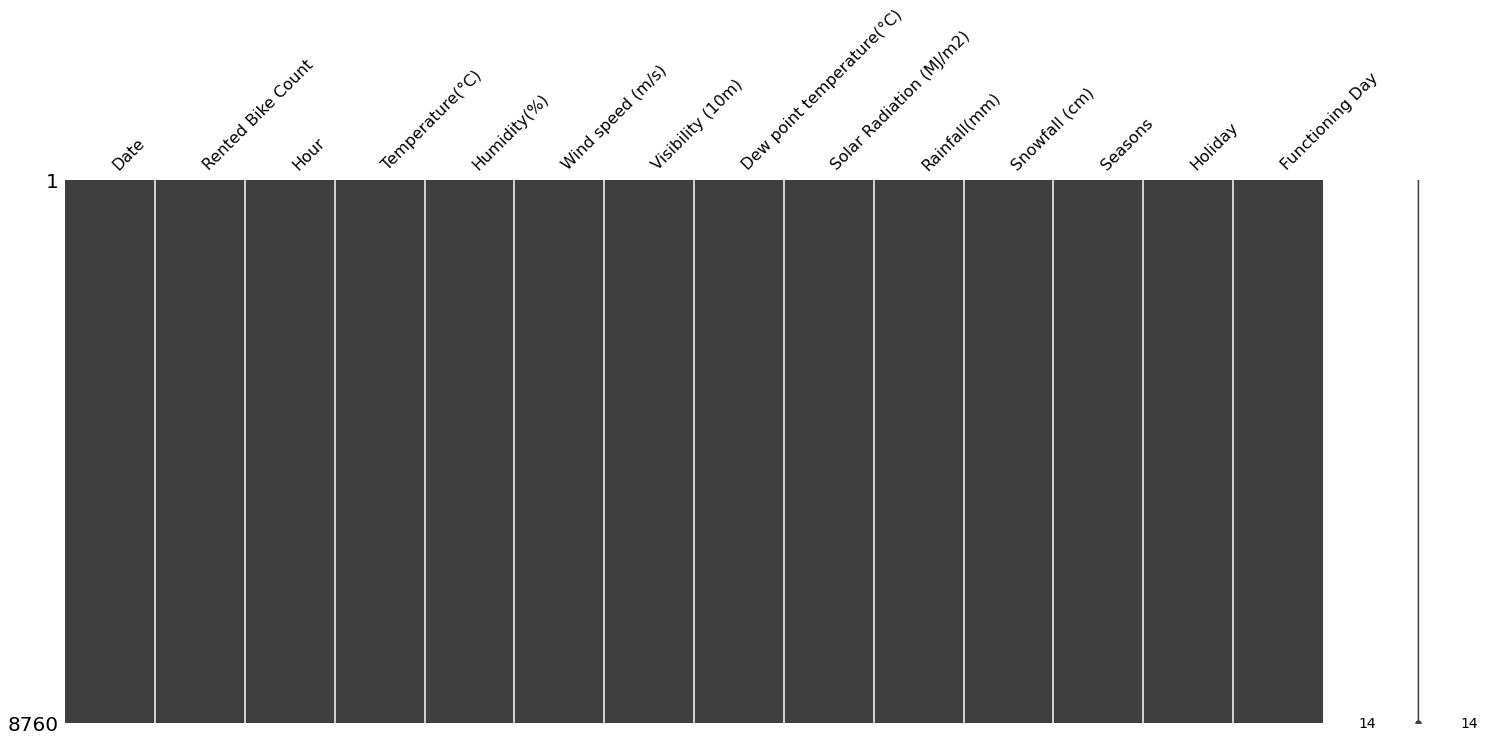

In [10]:
# To check if there any missing values in the data set

import missingno as mn
mn.matrix(df)

There is no any missing values in this dataset

In [11]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [12]:
#duplicated
len(df[df.duplicated()])

0

In [13]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Date'].dtype

dtype('<M8[ns]')

df.set_index(pd.to_datetimeIndex(df['Date'].values))

In [15]:
df['year'] =  pd.DatetimeIndex(df['Date']).year

In [16]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [17]:
df['day'] = pd.DatetimeIndex(df['Date']).day

In [18]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


In [19]:
# Drop the date column as we have extracted the correct day, month and year
df['weekdays_weekend'] = df['day'].apply(lambda x:1 if x == 'Saturday' or x == 'Sunday' else  0)

df.drop(columns=['Date','year','day'], axis=1, inplace=True)

In [20]:
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [21]:
df['weekdays_weekend'].value_counts()

0    8760
Name: weekdays_weekend, dtype: int64

In [22]:
df.head

<bound method NDFrame.head of       Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254    0             -5.2           37               2.2   
1                   204    1             -5.5           38               0.8   
2                   173    2             -6.0           39               1.0   
3                   107    3             -6.2           40               0.9   
4                    78    4             -6.0           36               2.3   
...                 ...  ...              ...          ...               ...   
8755               1003   19              4.2           34               2.6   
8756                764   20              3.4           37               2.3   
8757                694   21              2.6           39               0.3   
8758                712   22              2.1           41               1.0   
8759                584   23              1.9           43               1.3   

      Vis

Exploratory Data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


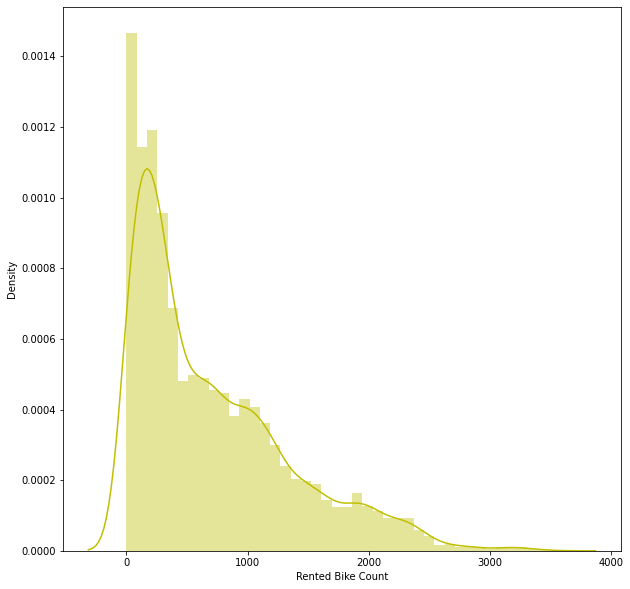

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(df['Rented Bike Count'], color='y')

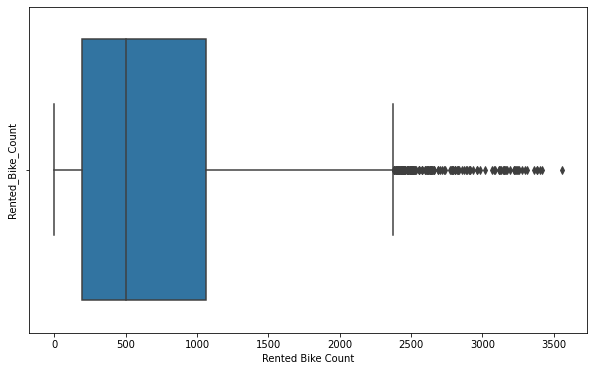

In [24]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


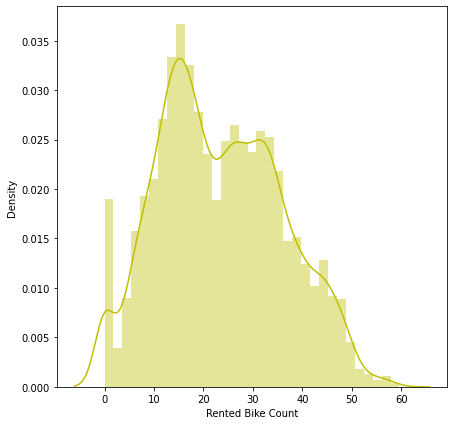

In [25]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']),color='y')

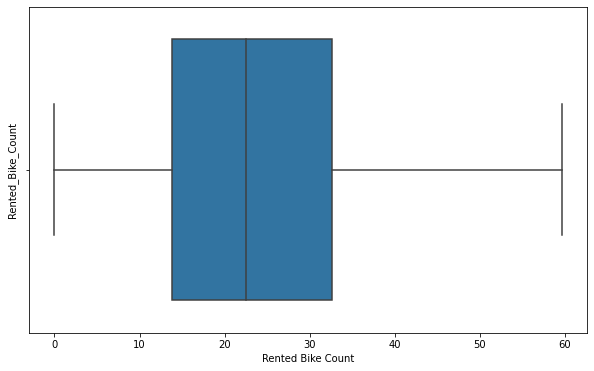

In [26]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

In [27]:
# numerical columns only
numerical_features = df.describe().columns
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

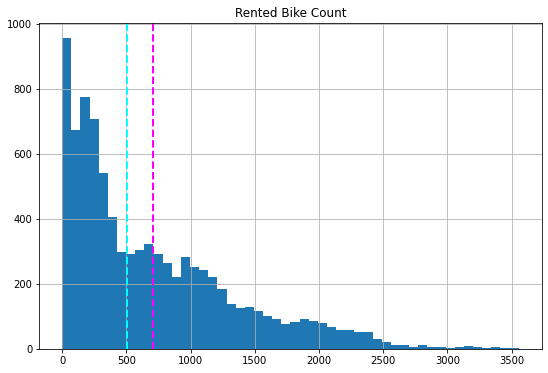

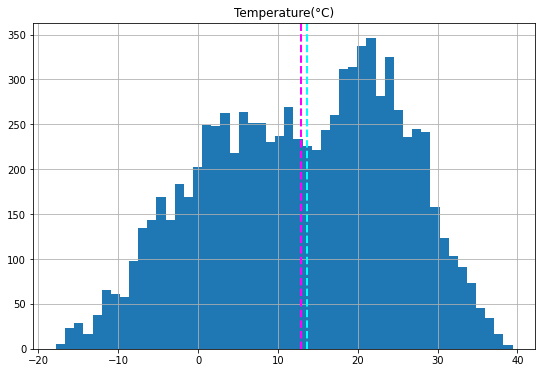

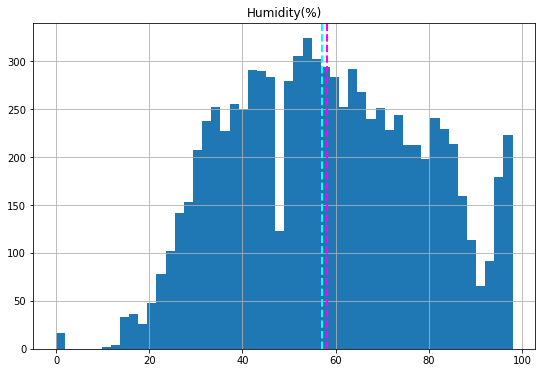

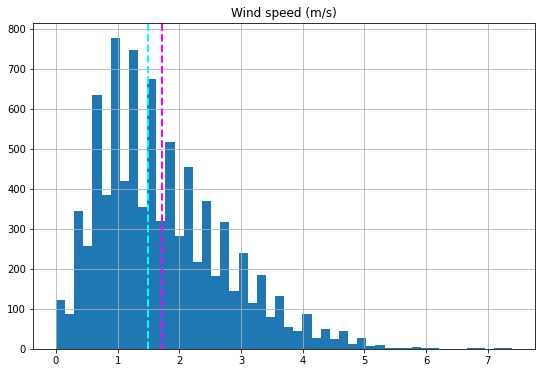

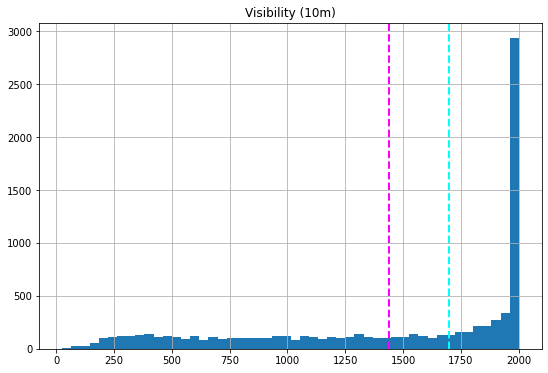

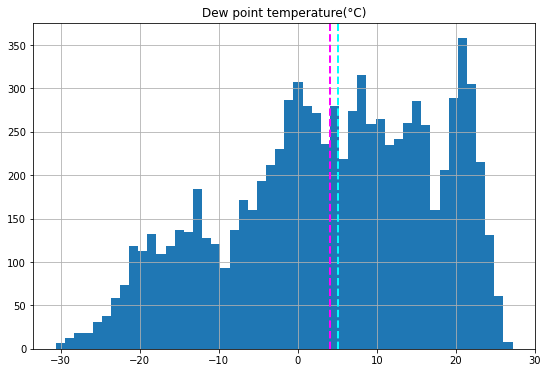

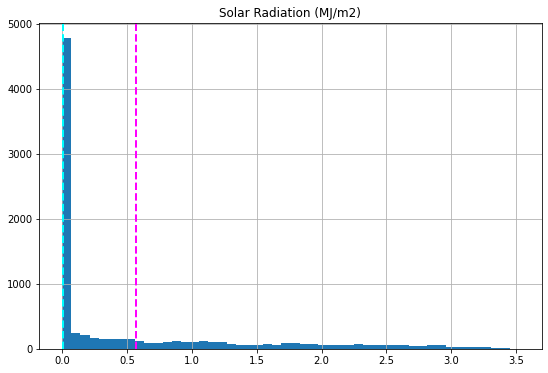

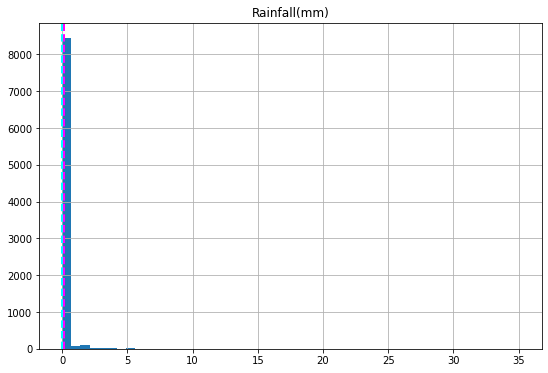

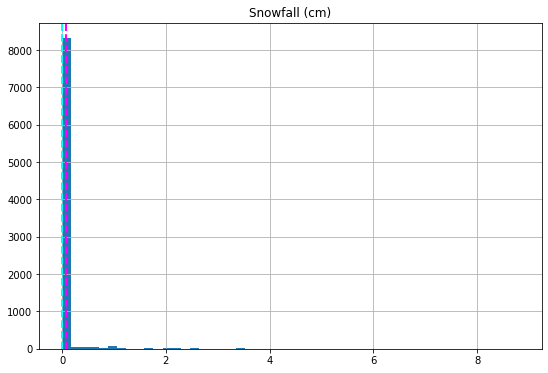

In [28]:
for col in numerical_features :
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


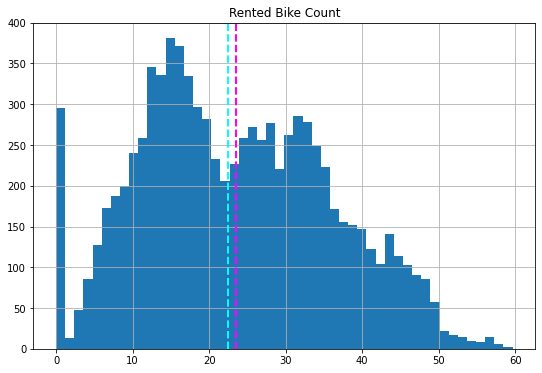

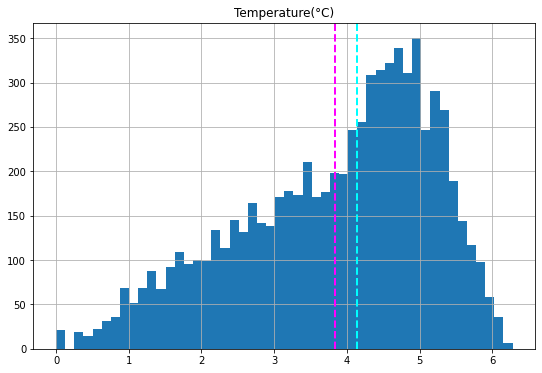

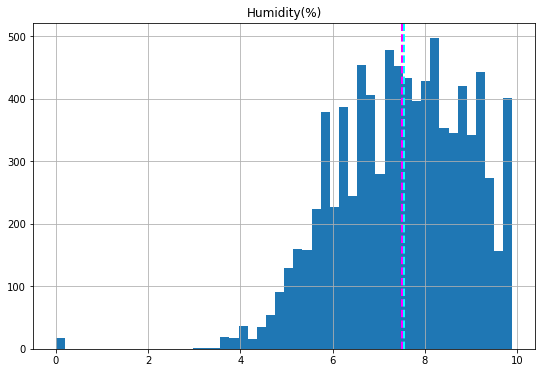

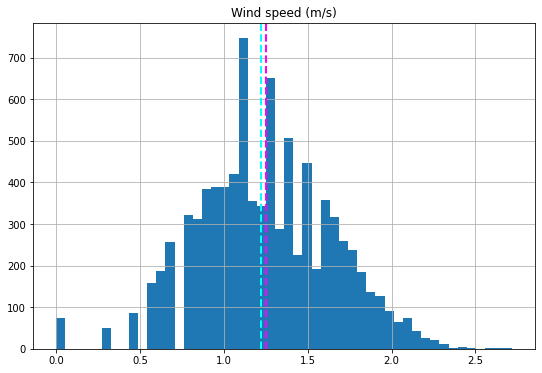

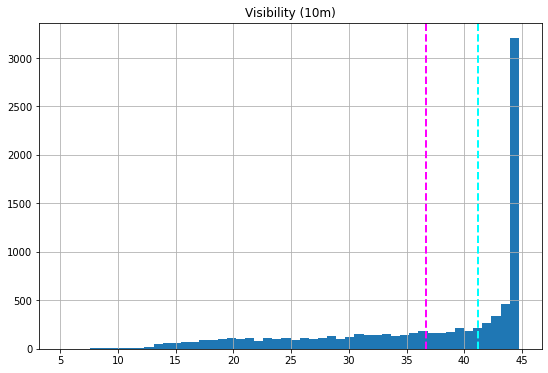

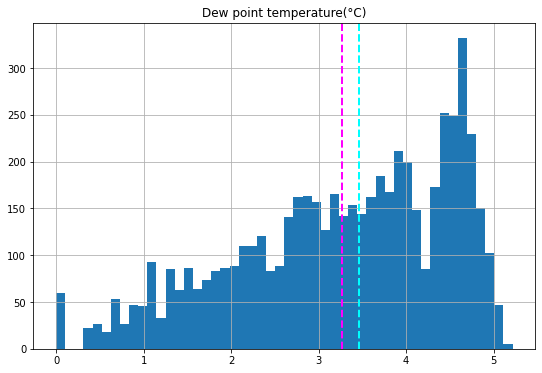

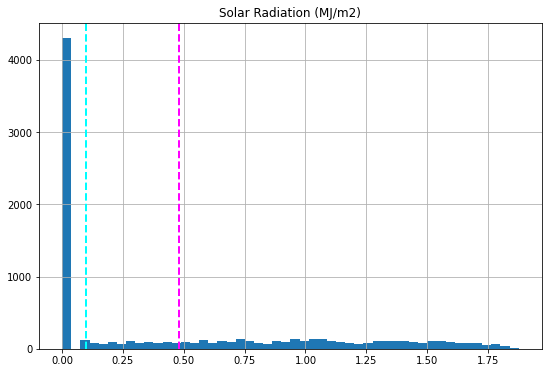

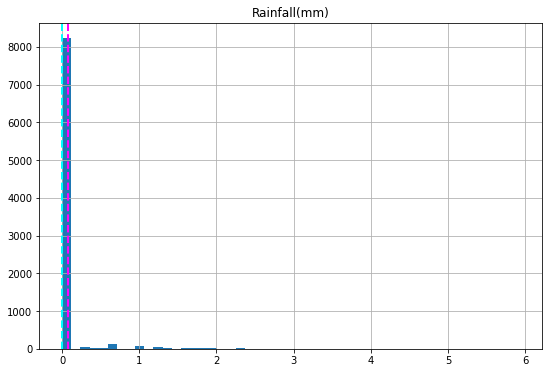

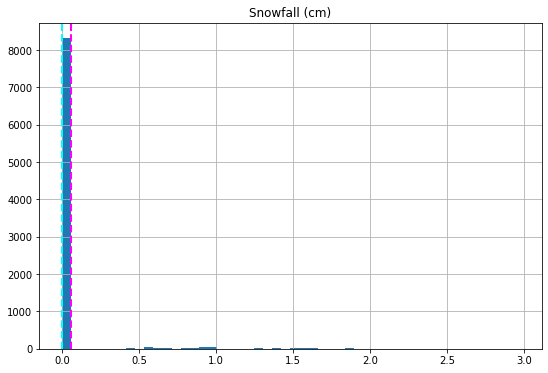

In [29]:
for col in numerical_features :
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = np.sqrt(df[col])
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

In [30]:
df.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [31]:
df['weekdays_weekend'].value_counts()

0    8760
Name: weekdays_weekend, dtype: int64

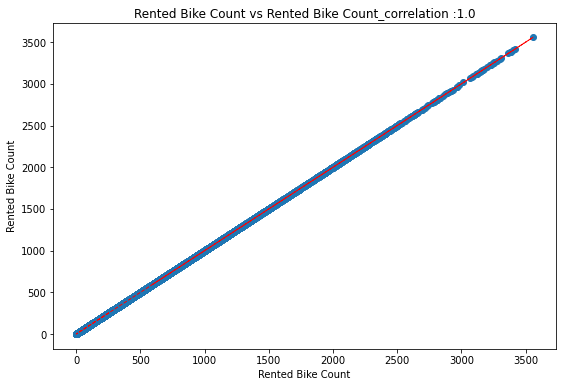

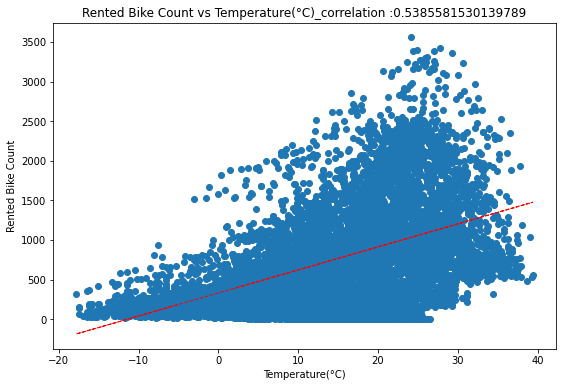

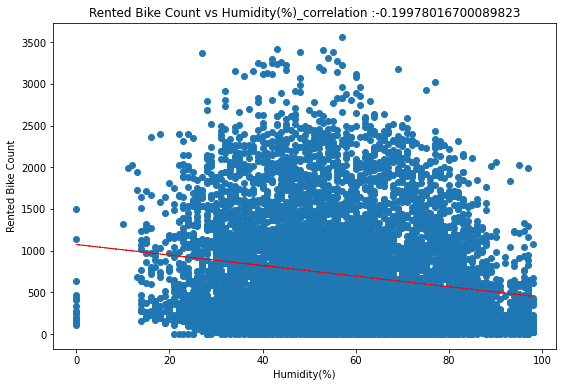

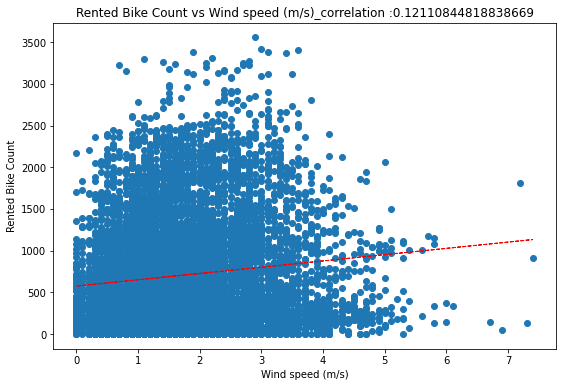

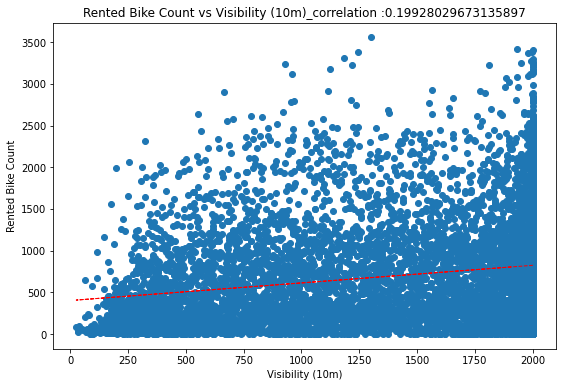

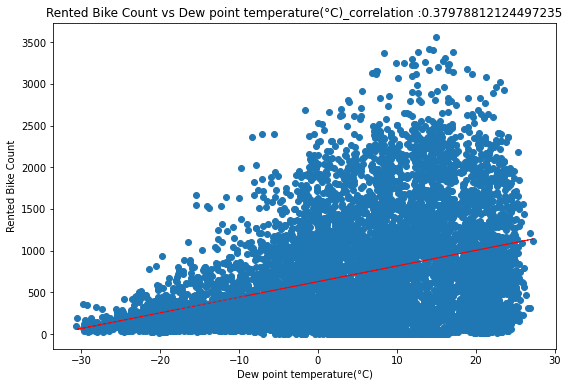

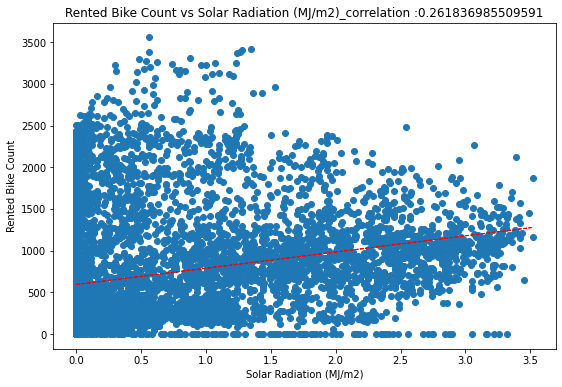

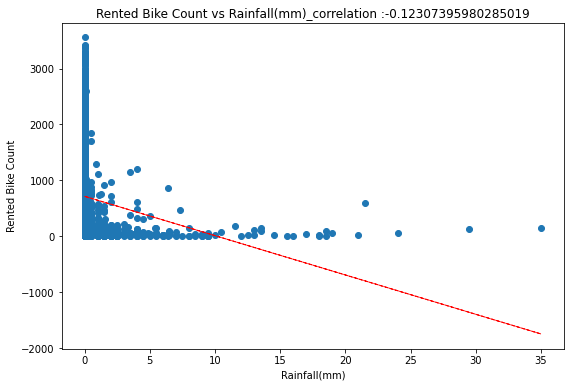

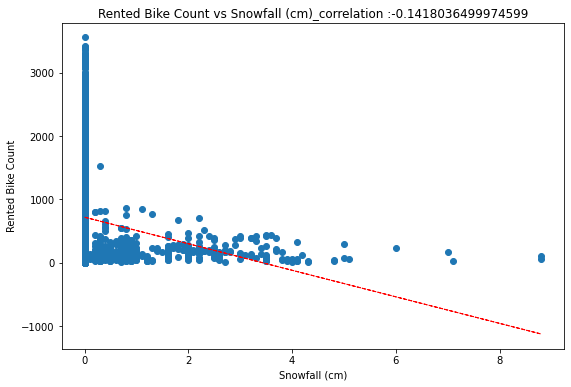

In [32]:
from scipy.spatial.distance import correlation
for col in numerical_features:
  fig = plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = df[col]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')

  ax.set_title('Rented Bike Count vs' + " "+col + '_correlation :' + str(correlation))
  z = np.polyfit(df[col],df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat,"r--",lw=1)
plt.show()

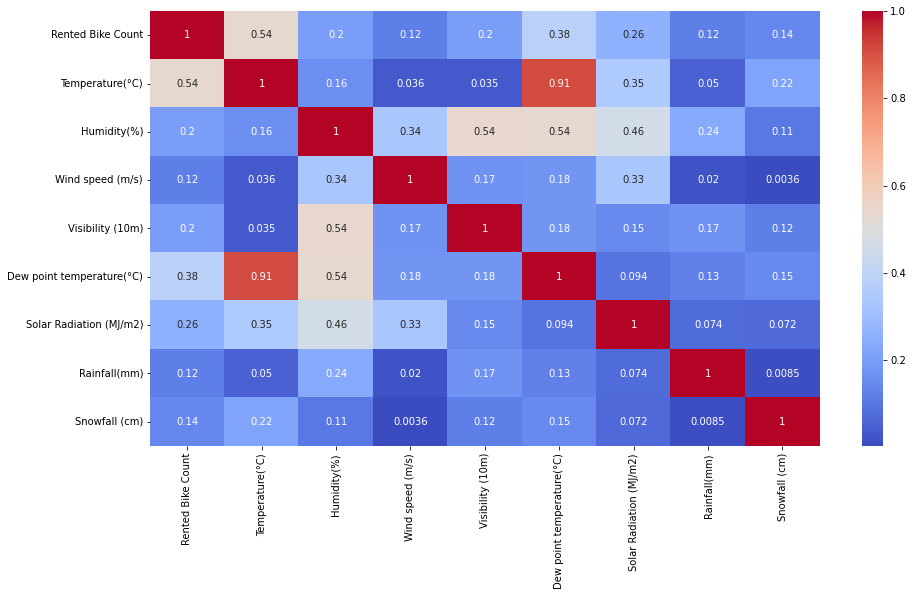

In [33]:
plt.figure(figsize=(15,8))
correlation =  df.corr()
sns.heatmap(abs (correlation), annot=True ,cmap = 'coolwarm')

In [34]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [35]:
#removing multicollinearity
df['new_temp'] = 0.5*df['Temperature(°C)'] + 0.5 * df['Dew point temperature(°C)']

In [36]:
#multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
  # calculating vif
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return(vif)

In [37]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Temperature(°C)','Dew point temperature(°C)']]])

,variables,VIF
0,Humidity(%),4.948927
1,Wind speed (m/s),4.172802
2,Visibility (10m),4.390699
3,Solar Radiation (MJ/m2),2.056034
4,Rainfall(mm),1.078836
5,Snowfall (cm),1.116727
6,new_temp,2.166404


In [38]:
categorical_features = df.describe(include=['object','category']).columns

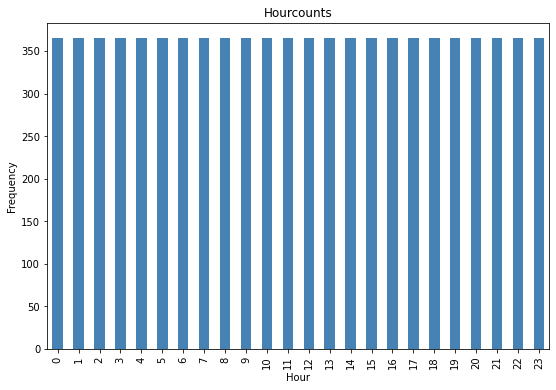

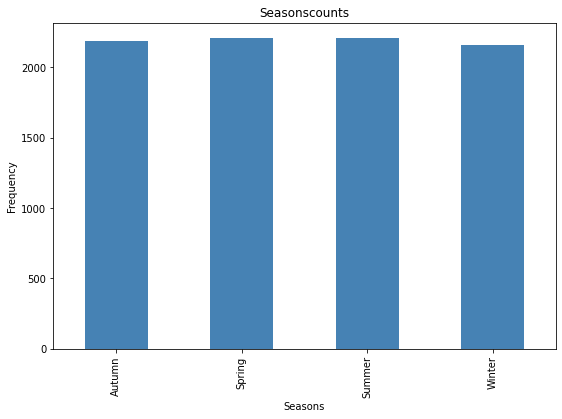

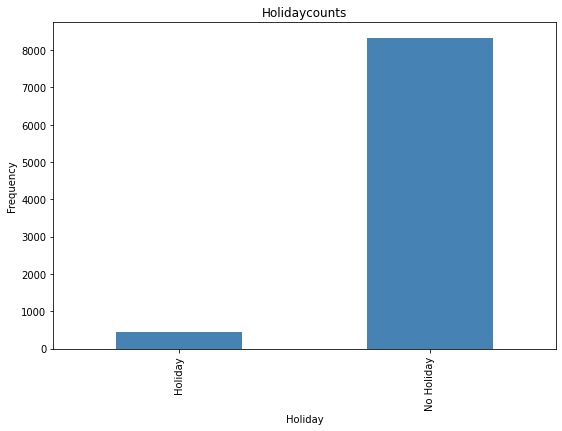

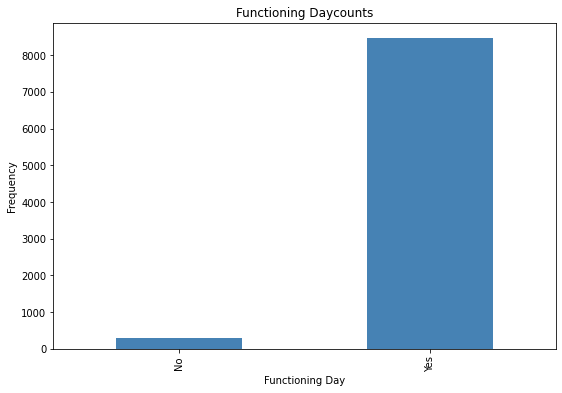

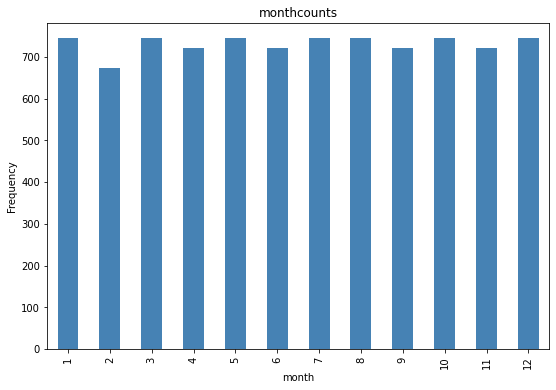

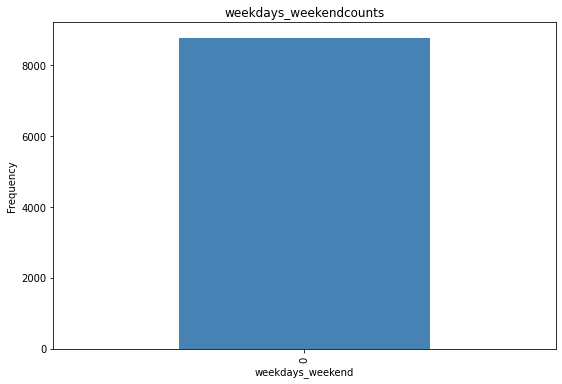

In [41]:
for col in categorical_features:
  counts = df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(9,6))
  ax=fig.gca()
  counts.plot.bar(ax=ax, color='steelblue')
  ax.set_title(col+'counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.show()